# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Manusia tidak terlepas dengan hobi. Hobi adalah kegiatan yang dilakukan secara teratur, dan dikerjakan
kesenangan diri. Biasanya, hobi dilakukan selama waktu luang. Ketika remaja cenderung memiliki kebingungan
dalam memutuskan hobi mana yang cocok atau mereka sukai. Dataset ini berisi kumpulan data survei dari
para orang tua.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/abtabm/hobby-prediction-basic)
bertujuan untuk menganalisis dan mengklasifikasi hobi yang cocok untuk anak remaja dan diharapkan
bisa membantu orangtua dalam memilih hobi yang cocok dengan anak mereka.

In [ ]:
Data Understanding

Berikut atribut-atribut dari dataset ini :

0. Olympiad_Participation = Apakah anak Anda berpartisipasi dalam Olimpiade Sains/Matematika
1. Scholarship = Apakah anak anda telah menerima beasiswa
2. School = Apakah anak anda senang pergi ke sekolah
3. Fav_sub = Mata pelajaran apa yang dia sukai
4. Projects = Apakah dia telah melakukan proyek apa pun sebelumnya selama sekolah
5. Grasp_pow = Daya tangkap dia dalam pembelajaran
6. Time_sprt = Berapa jam yang dihabiskan dia untuk bermain di dalam atau di luar ruangan
7. Medals = Apakah dia pernah memenagkan medali di bidang olahraga
8. Career_sprt = Apakah dia ingin melanjutkan karirnya di bidang olahraga
9. Act_sprt = Apakah dia rajin mengikuti kegiatan olahraga
10. Fant_arts = Apakah dia suka membuat lukisan fantasi
11. Won_arts = Apakah dia pernah memenangkan perlombaan seni
12. Time_art = Berapa jam yang dihabiskan dalam seni
13. Predicted_Hobby = prediksi hobi yang disarankan

In [ ]:
Data Preparation

Yang digunakan sebagai fitur dalam dataset ini adalah:

0. Olympiad_Participation
1. Scholarship
2. School
3. Fav_sub
4. Projects
5. Grasp_pow
6. Time_sprt
7. Medals
8. Career_sprt
9. Act_sprt
10. Fant_arts
11. Won_arts
12. Time_art

Sedangkan, yang menjadi target yaitu Predicted_Hobby

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Hobby_Data.csv")

In [3]:
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted_Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Olympiad_Participation  1601 non-null   object
 1   Scholarship             1601 non-null   object
 2   School                  1601 non-null   object
 3   Fav_sub                 1601 non-null   object
 4   Projects                1601 non-null   object
 5   Grasp_pow               1601 non-null   int64 
 6   Time_sprt               1601 non-null   int64 
 7   Medals                  1601 non-null   object
 8   Career_sprt             1601 non-null   object
 9   Act_sprt                1601 non-null   object
 10  Fant_arts               1601 non-null   object
 11  Won_arts                1601 non-null   object
 12  Time_art                1601 non-null   int64 
 13  Predicted_Hobby         1601 non-null   object
dtypes: int64(3), object(11)
memory usage: 175.2+ KB


# Transformasi Data

In [5]:
# memisahkan numerik dan kategori
nomor = []
huruf = []

for col in df.columns:
    if df[col].dtype == 'int64':
        nomor.append(col)
    else:
        huruf.append(col)

for col in df.columns:
    if col in nomor:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
nomor

['Grasp_pow', 'Time_sprt', 'Time_art']

In [7]:
huruf

['Olympiad_Participation',
 'Scholarship',
 'School',
 'Fav_sub',
 'Projects',
 'Medals',
 'Career_sprt',
 'Act_sprt',
 'Fant_arts',
 'Won_arts',
 'Predicted_Hobby']

In [8]:
df['Predicted_Hobby'].value_counts()

Predicted_Hobby
Academics    699
Sports       492
Arts         410
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in huruf:
    df[col] = le.fit_transform(df[col])

In [10]:
df['Predicted_Hobby'] = le.fit_transform(df['Predicted_Hobby'])

In [11]:
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted_Hobby
0,1,1,1,2,1,5,1,1,0,0,0,0,3,0
1,1,1,1,2,1,3,2,0,0,0,0,1,1,0
2,1,1,1,3,1,5,1,1,0,0,0,1,1,0
3,1,1,1,2,1,5,1,1,0,0,0,0,3,0
4,1,1,1,3,1,5,3,0,0,0,0,1,2,0


In [12]:
df.to_csv('hobi.csv')

In [13]:
df['Predicted_Hobby'].value_counts()

Predicted_Hobby
0    699
2    492
1    410
Name: count, dtype: int64

# Visualisasi Data

Predicted_Hobby
0    699
2    492
1    410
Name: count, dtype: int64

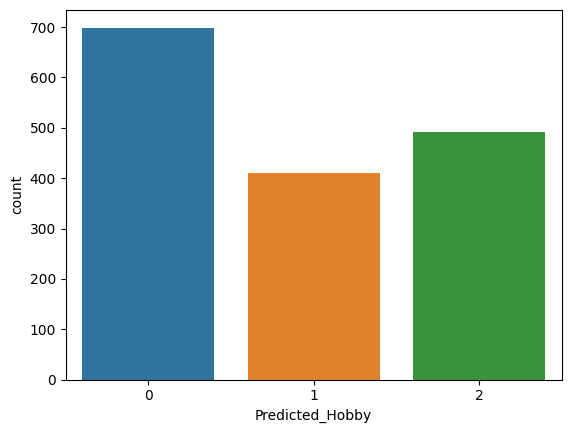

In [14]:
import seaborn as sns

sns.countplot(x = "Predicted_Hobby", data = df)
df.loc[:,"Predicted_Hobby"].value_counts()

Fav_sub
2    680
3    515
0    288
1    118
Name: count, dtype: int64

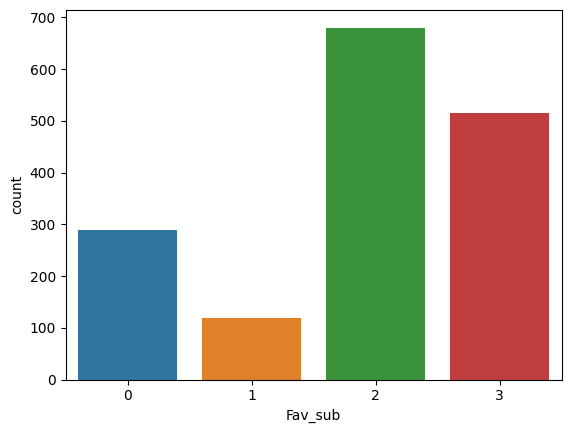

In [15]:
sns.countplot(x = "Fav_sub", data = df)
df.loc[:,"Fav_sub"].value_counts()

# Split data

In [16]:
X = df.drop(columns=['Predicted_Hobby'], axis=1)
Y = df['Predicted_Hobby']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, x_train.shape, x_test.shape)

(1601, 13) (1280, 13) (321, 13)


# Modeling

### Membuat model training

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
model = knn.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [21]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [22]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.92421875


In [23]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [24]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.881619937694704


# Model Prediksi

In [29]:
input_data = (1,1,1,2,1,6,4,1,0,0,0,1,2)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Hobi Yang Disarankan Adalah Di Bidang Akademik')
elif (prediksi == 1):
    print('Hobi Yang Disarankan Adalah Di Bidang Seni')
else:
    print('Hobi Yang Disarankan Adalah Di Bidang Olahraga')

[0]
Hobi Yang Disarankan Adalah Di Bidang Akademik


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Deployment

### Save Model

In [26]:
import pickle

filename = 'hobi_anak.sav'
pickle.dump(model, open(filename, 'wb'))